<a href="https://colab.research.google.com/github/thoufiqz55/Ensemble_pr/blob/main/Ensemble_PR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [278]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import zscore

In [279]:
#Loading Data Set

data = pd.read_csv("/content/drive/MyDrive/Dataset/talking_data.csv")

In [280]:
data.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,87540,12,1,13,497,2017-11-07 09:30:38,NaN,0
1,105560,25,1,17,259,2017-11-07 13:40:27,NaN,0
2,101424,12,1,19,212,2017-11-07 18:05:24,NaN,0
3,94584,13,1,13,477,2017-11-07 04:58:08,NaN,0
4,68413,12,1,1,178,2017-11-09 09:00:09,NaN,0


In [330]:
data["app"].value_counts()

3      18279
12     13198
2      11737
9       8992
15      8595
       ...  
145        1
97         1
96         1
267        1
261        1
Name: app, Length: 161, dtype: int64

In [281]:
data.shape

(100000, 8)

In [282]:
data.columns

Index(['ip', 'app', 'device', 'os', 'channel', 'click_time', 'attributed_time',
       'is_attributed'],
      dtype='object')

In [283]:
data.isnull().sum()

ip                     0
app                    0
device                 0
os                     0
channel                0
click_time             0
attributed_time    99773
is_attributed          0
dtype: int64

In [284]:
df = data.copy()

In [285]:
df.drop('attributed_time',axis='columns', inplace=True)

In [286]:
df.columns

Index(['ip', 'app', 'device', 'os', 'channel', 'click_time', 'is_attributed'], dtype='object')

In [287]:
df.isnull().sum()

ip               0
app              0
device           0
os               0
channel          0
click_time       0
is_attributed    0
dtype: int64

In [288]:
data.nunique()

ip                 34857
app                  161
device               100
os                   130
channel              161
click_time         80350
attributed_time      227
is_attributed          2
dtype: int64

In [289]:
print(data['ip'].nunique())

34857


In [290]:
print(data['is_attributed'].unique().sum())

1


In [291]:
app_use = df.groupby('app').is_attributed.agg(['mean','count'])
app_use

,mean,count
app,,
1,0.000000,3135
2,0.000000,11737
3,0.000219,18279
4,0.000000,58
5,0.074468,188
...,...,...
486,0.000000,1
536,0.000000,1
538,0.000000,1


In [292]:
app_of = df.groupby('app').size().reset_index(name='count')
app_of = app_of[app_of['count']>app_of['count'].quantile(0.80)]
app_of = app_of.merge(df, on = 'app', how ='inner')
app_of.head()

,app,count,ip,device,os,channel,click_time,is_attributed
0,1,3135,17059,1,17,135,2017-11-09 01:17:58,0
1,1,3135,52432,1,13,115,2017-11-07 17:22:52,0
2,1,3135,89242,1,27,124,2017-11-07 09:37:21,0
3,1,3135,123994,1,19,101,2017-11-09 14:27:57,0
4,1,3135,34067,1,15,134,2017-11-07 15:06:06,0


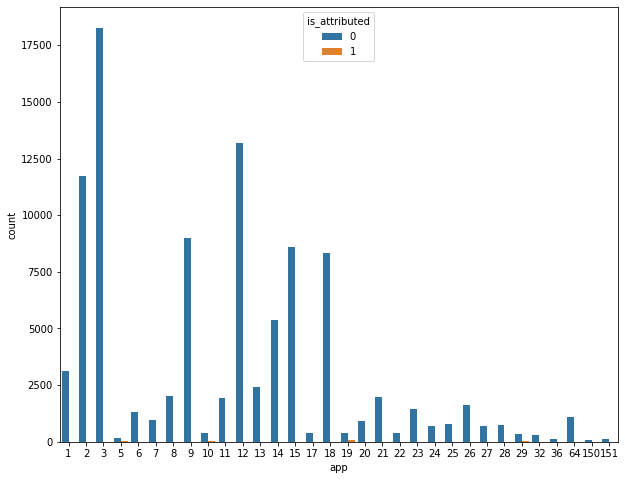

In [293]:
plt.figure(figsize=(10,8))
sns.countplot(x= 'app',hue ='is_attributed',data=app_of)

Adding New Columns
 * Week
 * Year
 * Month
 * Hour

In [294]:
df['datetime']=pd.to_datetime(df['click_time'])
df['day_of_week']=df['datetime'].dt.day_of_week
df['day of year']=df['datetime'].dt.day_of_year
df['month']=df['datetime'].dt.month
df['hour']=df['datetime'].dt.hour

In [295]:
df.head()

,ip,app,device,os,channel,click_time,is_attributed,datetime,day_of_week,day of year,month,hour
0,87540,12,1,13,497,2017-11-07 09:30:38,0,2017-11-07 09:30:38,1,311,11,9
1,105560,25,1,17,259,2017-11-07 13:40:27,0,2017-11-07 13:40:27,1,311,11,13
2,101424,12,1,19,212,2017-11-07 18:05:24,0,2017-11-07 18:05:24,1,311,11,18
3,94584,13,1,13,477,2017-11-07 04:58:08,0,2017-11-07 04:58:08,1,311,11,4
4,68413,12,1,1,178,2017-11-09 09:00:09,0,2017-11-09 09:00:09,3,313,11,9


In [296]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   ip             100000 non-null  int64         
 1   app            100000 non-null  int64         
 2   device         100000 non-null  int64         
 3   os             100000 non-null  int64         
 4   channel        100000 non-null  int64         
 5   click_time     100000 non-null  object        
 6   is_attributed  100000 non-null  int64         
 7   datetime       100000 non-null  datetime64[ns]
 8   day_of_week    100000 non-null  int64         
 9   day of year    100000 non-null  int64         
 10  month          100000 non-null  int64         
 11  hour           100000 non-null  int64         
dtypes: datetime64[ns](1), int64(10), object(1)
memory usage: 9.2+ MB


In [297]:
df.drop(['click_time','datetime'],axis ='columns', inplace=True)

In [298]:
df.head()

,ip,app,device,os,channel,is_attributed,day_of_week,day of year,month,hour
0,87540,12,1,13,497,0,1,311,11,9
1,105560,25,1,17,259,0,1,311,11,13
2,101424,12,1,19,212,0,1,311,11,18
3,94584,13,1,13,477,0,1,311,11,4
4,68413,12,1,1,178,0,3,313,11,9


In [299]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   ip             100000 non-null  int64
 1   app            100000 non-null  int64
 2   device         100000 non-null  int64
 3   os             100000 non-null  int64
 4   channel        100000 non-null  int64
 5   is_attributed  100000 non-null  int64
 6   day_of_week    100000 non-null  int64
 7   day of year    100000 non-null  int64
 8   month          100000 non-null  int64
 9   hour           100000 non-null  int64
dtypes: int64(10)
memory usage: 7.6 MB


In [300]:
#Balancing data

X = df.drop(['is_attributed'],axis=1)
Y =df['is_attributed']

In [301]:
# ax = data['is_attributed'].value_counts().plot(kind='bar', figsize=(10, 6), fontsize=13, color='#087E8B')
# ax.set_title('Attributed(Target) (0 = normal, 1 = fraud)', size=20, pad=30)


# for i in ax.patches:
#     ax.text(i.get_x() + 0.19, i.get_height() + 700, str(round(i.get_height(), 2)), fontsize=15)

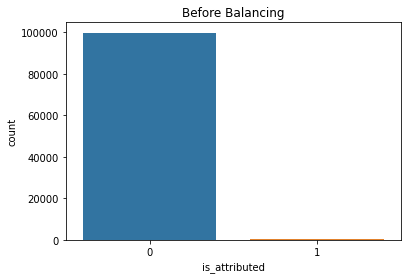

In [302]:
sns.countplot(Y)
plt.title('Before Balancing')
plt.show()

In [303]:
from imblearn.over_sampling import SMOTE

sm =SMOTE(random_state=2)
X, Y = sm.fit_resample(X,Y.ravel())

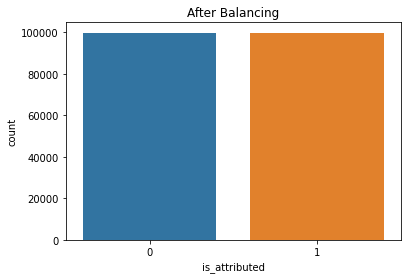

In [304]:
sns.countplot(Y)
plt.title("After Balancing")
plt.xlabel('is_attributed')
plt.show()

In [308]:
# from xgboost import XGBClassifier
# from xgboost import plot_importance
# from sklearn.metrics import classification_report
# from sklearn import metrics
# from sklearn import preprocessing
# from sklearn.metrics import accuracy_score, recall_score, confusion_matrix


In [309]:
# xgbl = XGBClassifier()
# xgbl = xgbl.fit(x_train, y_train)
# test_pred = xgbl.predict_proba(x_test)
# xgbl_score = xgbl.score(x_test, y_test)
# print(xgbl_score)

In [311]:
# from sklearn.metrics import roc_auc_score
# from sklearn import metrics

# acc_score =roc_auc_score(y_test, y_pred[:,1])
# print((acc_score)*100)

In [312]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import BaggingClassifier

# model = BaggingClassifier(base_estimator=LogisticRegression(), n_estimators=10, bootstrap=True)
# model = model.fit(x_train, y_train)

# pred = model.predict_proba(x_test)
# mod_bc = model.score(x_test,y_test)

In [316]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
# X=df.drop(['is_attributed'],axis=1)
# Y=df['is_attributed']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(159636, 9)
(159636,)
(39910, 9)
(39910,)


In [317]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators=10, max_samples= .7, bootstrap=True)
bgcl = bgcl.fit(X_train, Y_train)
test_pred = bgcl.predict(X_test)
bgcl_score=bgcl.score(X_test, Y_test)
print("The Bagging classifier model accuracy is {}".format(bgcl_score))
print("The confusion matrix of Bagging classifier model is")
print(metrics.confusion_matrix(Y_test,test_pred))

The Bagging classifier model accuracy is 0.9971185166624906
The confusion matrix of Bagging classifier model is
[[19863    80]
 [   35 19932]]


In [318]:
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
xgbl=XGBClassifier()
xgbl.fit(X_train,Y_train)
test_pred=xgbl.predict(X_test)
xgbl_score=xgbl.score(X_test,Y_test)
print("The XGBoostclassifier model accuracy is {}".format(xgbl_score))
print("The confusion matrix of XGBoostclassifier model is")
print(metrics.confusion_matrix(Y_test,test_pred))

The XGBoostclassifier model accuracy is 0.9581057379102982
The confusion matrix of XGBoostclassifier model is
[[19244   699]
 [  973 18994]]


In [319]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [320]:
Y_pred=xgbl.predict_proba(X_test)
Y_pred

array([[0.6868279 , 0.31317207],
       [0.9869171 , 0.01308293],
       [0.0035432 , 0.9964568 ],
       ...,
       [0.98271096, 0.01728903],
       [0.983309  , 0.01669104],
       [0.91834337, 0.08165666]], dtype=float32)

In [321]:
# AUC/ROC for XGBoostClassifier
auc=metrics.roc_auc_score(Y_test,Y_pred[:,1])
print('AUC = {} %'.format(auc*100))

AUC = 99.1905168825659 %


In [322]:
Y_pred1=bgcl.predict_proba(X_test)
Y_pred1

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [323]:
# AUC/ROC for BaggingClassifier
roc=metrics.roc_auc_score(Y_test,Y_pred1[:,1])
print('ROC = {}%'.format(roc*100))

ROC = 99.94102903295928%
